In [87]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## K-means

In [88]:
np.random.seed(0)
len = 100
s = list(np.random.normal(0, 1, len))
s_1 = list(np.random.normal(0, 1, len))
dataset = pd.DataFrame({"Col_1": s, "Col_2": s_1})
dataset.iloc[:int(len/3),:] = dataset.iloc[:int(len/3),:]+5
dataset.iloc[int(len/3):int(2*len/3),:] = dataset.iloc[int(len/3):int(2*len/3),:]+3
dataset.iloc[int(2*len/3):,:] = dataset.iloc[int(2*len/3):,:]
dataset

,Col_1,Col_2
0,6.764052,6.883151
1,5.400157,3.652241
2,5.978738,3.729515
3,7.240893,5.969397
4,6.867558,3.826877
...,...,...
95,0.706573,-0.171546
96,0.010500,0.771791
97,1.785870,0.823504
98,0.126912,2.163236


In [89]:
X = dataset[["Col_1", "Col_2"]]

In [90]:
kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=3)

In [91]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [92]:
kmeans.cluster_centers_

array([[ 2.585738  ,  3.13824623],
       [ 0.1522518 , -0.13194814],
       [ 5.52778589,  5.31209881]])

In [93]:
print(kmeans.predict(np.array([[0,0]])), kmeans.predict(np.array([[2,2]])))

[1] [0]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


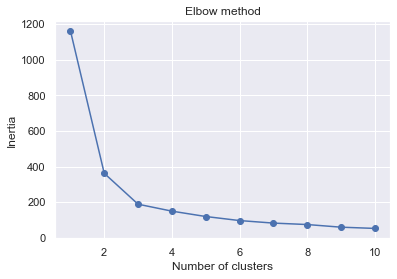

In [94]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X = dataset[["Col_1", "Col_2"]])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Hierarchical Clustering

Text(0, 0.5, 'Euclidean distance')

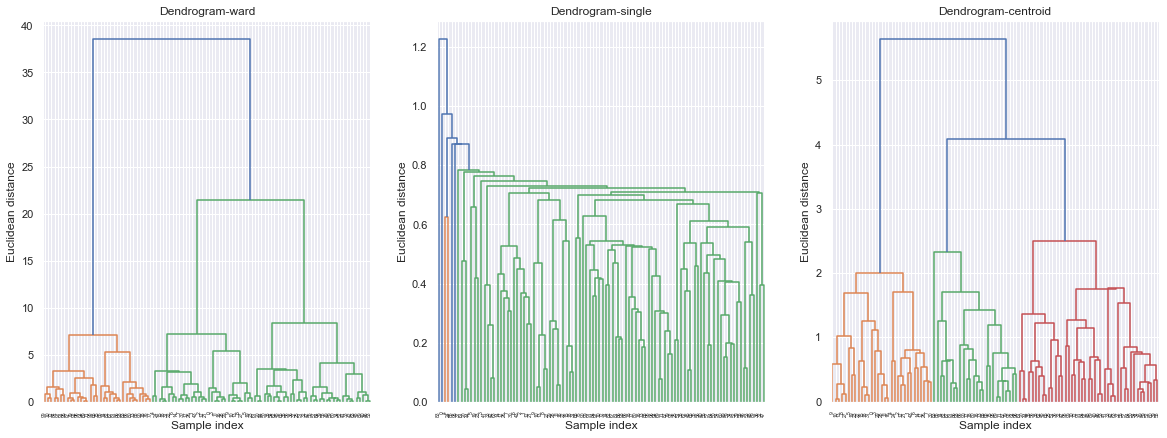

In [100]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
# Create dendrogram
plt.subplot(1, 3, 1)
sc.dendrogram(sc.linkage(dataset[["Col_1", "Col_2"]], method='ward'))
plt.title('Dendrogram-ward')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.subplot(1, 3, 2)
sc.dendrogram(sc.linkage(dataset[["Col_1", "Col_2"]], method='single'))
plt.title('Dendrogram-single')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.subplot(1, 3, 3)
sc.dendrogram(sc.linkage(dataset[["Col_1", "Col_2"]], method='centroid'))
plt.title('Dendrogram-centroid')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [96]:
hierarchical_cluster = AgglomerativeClustering(affinity='euclidean', linkage='complete')
hierarchical_cluster.fit(dataset[["Col_1", "Col_2"]])
hierarchical_cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [97]:
hierarchical_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
hierarchical_cluster.fit(dataset[["Col_1", "Col_2"]])
hierarchical_cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
hierarchical_cluster = AgglomerativeClustering(affinity='euclidean', linkage='average')
hierarchical_cluster.fit(dataset[["Col_1", "Col_2"]])
hierarchical_cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
hierarchical_cluster = AgglomerativeClustering(affinity='euclidean', linkage='complete')
hierarchical_cluster.fit(dataset[["Col_1", "Col_2"]])
hierarchical_cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])